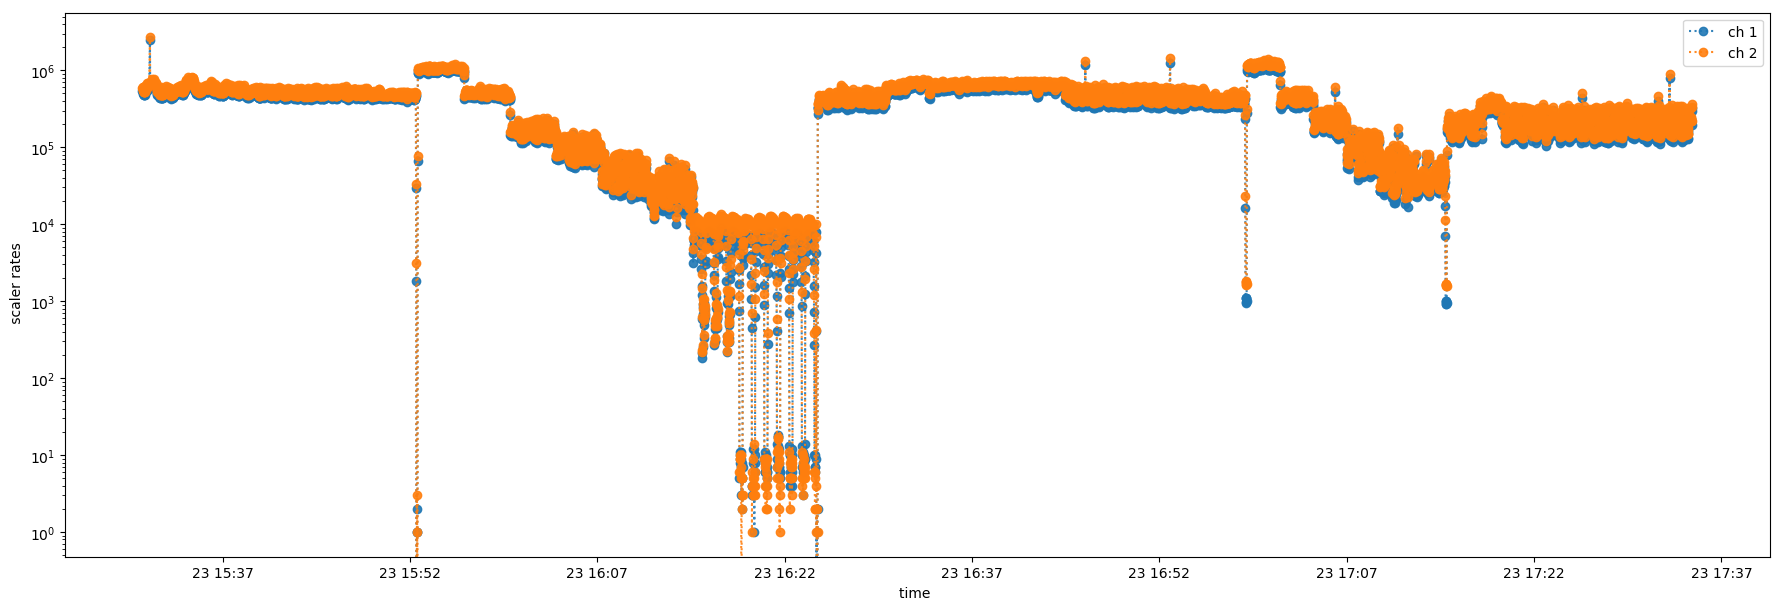

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [ ]:
import scaler
from matplotlib import pyplot as plt
%matplotlib inline
#scaler.scaler_tren_plot("0x1802",[1,2],10,"MDC-unten ")
scaler.scaler_tren_plot("0x1801",[1,2],10,"MDC-oben")

In [ ]:
import scaler

scaler.beep()


In [ ]:
import datetime
import time

startttime=datetime.datetime.now()
print("Starting now {:s} ".format(str(datetime.datetime.now())))
time.sleep(1) 
print("stopped now {:s} ".format(str(datetime.datetime.now())))
secs = 24334
print(datetime.datetime.now() + datetime.timedelta(0,secs))
#import time as time

In [ ]:
arr = [range(5,40,2)]
print( arr)


In [ ]:
import hameg_trb as htrb
htrb.buttons()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np
for i in range(5):
    clear_output(wait=True)
    y = np.random.random([10,1])
    plt.plot(y)
    plt.show()
    

In [ ]:
import IPython.display as ipd
import numpy
t = numpy.linspace(0, 0.5, int(0.6*24090), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*550*t)    
ipd.Audio(x, rate=24090, autoplay=True) # load a NumPy array